In [ ]:
#Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split #percentage split
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold
from sklearn.metrics import precision_recall_fscore_support

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Membaca dataset
df = pd.read_excel('/content/drive/MyDrive/Skripsi_Bismillah/Data Skripsi Survival/esophageal_survival.xlsx')

In [ ]:
#Cetak isi dataset csv
df

,Age,Education,Sex,Mstatus,Alcohol,Khat,Tobacco,family_history,Diff_swallowing,Pain_swallowing,...,Surgery,T_Hital_eso,T_Thoracic_eso,Laparatomy,Chemotherapy,Radiotherapy,Hospital_stay,Status_patient,Time_to_death,survive
0,66,3,1,2,2,2,2,2,1,1,...,0,2,2,2,0,0,1,2,1,0
1,66,3,2,2,2,1,2,2,1,2,...,1,1,2,2,0,0,1,2,1,0
2,62,1,2,2,1,1,1,2,1,2,...,0,2,2,2,1,0,1,2,2,0
3,62,1,2,2,1,2,2,2,1,2,...,1,1,2,2,1,0,16,2,16,1
4,45,4,1,2,2,2,2,2,1,2,...,0,2,2,1,0,0,8,2,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,55,3,2,2,2,1,2,2,1,2,...,1,1,2,2,0,0,1,2,13,1
345,45,2,1,2,2,2,2,2,1,2,...,1,1,2,2,0,0,2,1,18,1
346,67,2,2,2,2,1,2,2,1,2,...,1,2,2,2,0,0,1,1,13,1
347,32,2,1,2,2,2,2,2,1,2,...,1,2,2,1,0,0,2,2,14,1


In [ ]:
df.shape
#Hasilnya (jumlah data, jumlah features) atau (jumlah baris, jumlah kolom)

(349, 36)

In [ ]:
#Membaca 5 data teratas
df.head()

,Age,Education,Sex,Mstatus,Alcohol,Khat,Tobacco,family_history,Diff_swallowing,Pain_swallowing,...,Surgery,T_Hital_eso,T_Thoracic_eso,Laparatomy,Chemotherapy,Radiotherapy,Hospital_stay,Status_patient,Time_to_death,survive
0,66,3,1,2,2,2,2,2,1,1,...,0,2,2,2,0,0,1,2,1,0
1,66,3,2,2,2,1,2,2,1,2,...,1,1,2,2,0,0,1,2,1,0
2,62,1,2,2,1,1,1,2,1,2,...,0,2,2,2,1,0,1,2,2,0
3,62,1,2,2,1,2,2,2,1,2,...,1,1,2,2,1,0,16,2,16,1
4,45,4,1,2,2,2,2,2,1,2,...,0,2,2,1,0,0,8,2,7,1


In [ ]:
#Membaca 5 data terbawah
df.tail()

,Age,Education,Sex,Mstatus,Alcohol,Khat,Tobacco,family_history,Diff_swallowing,Pain_swallowing,...,Surgery,T_Hital_eso,T_Thoracic_eso,Laparatomy,Chemotherapy,Radiotherapy,Hospital_stay,Status_patient,Time_to_death,survive
344,55,3,2,2,2,1,2,2,1,2,...,1,1,2,2,0,0,1,2,13,1
345,45,2,1,2,2,2,2,2,1,2,...,1,1,2,2,0,0,2,1,18,1
346,67,2,2,2,2,1,2,2,1,2,...,1,2,2,2,0,0,1,1,13,1
347,32,2,1,2,2,2,2,2,1,2,...,1,2,2,1,0,0,2,2,14,1
348,58,2,2,2,1,1,1,2,1,2,...,1,2,2,1,0,0,3,2,3,0


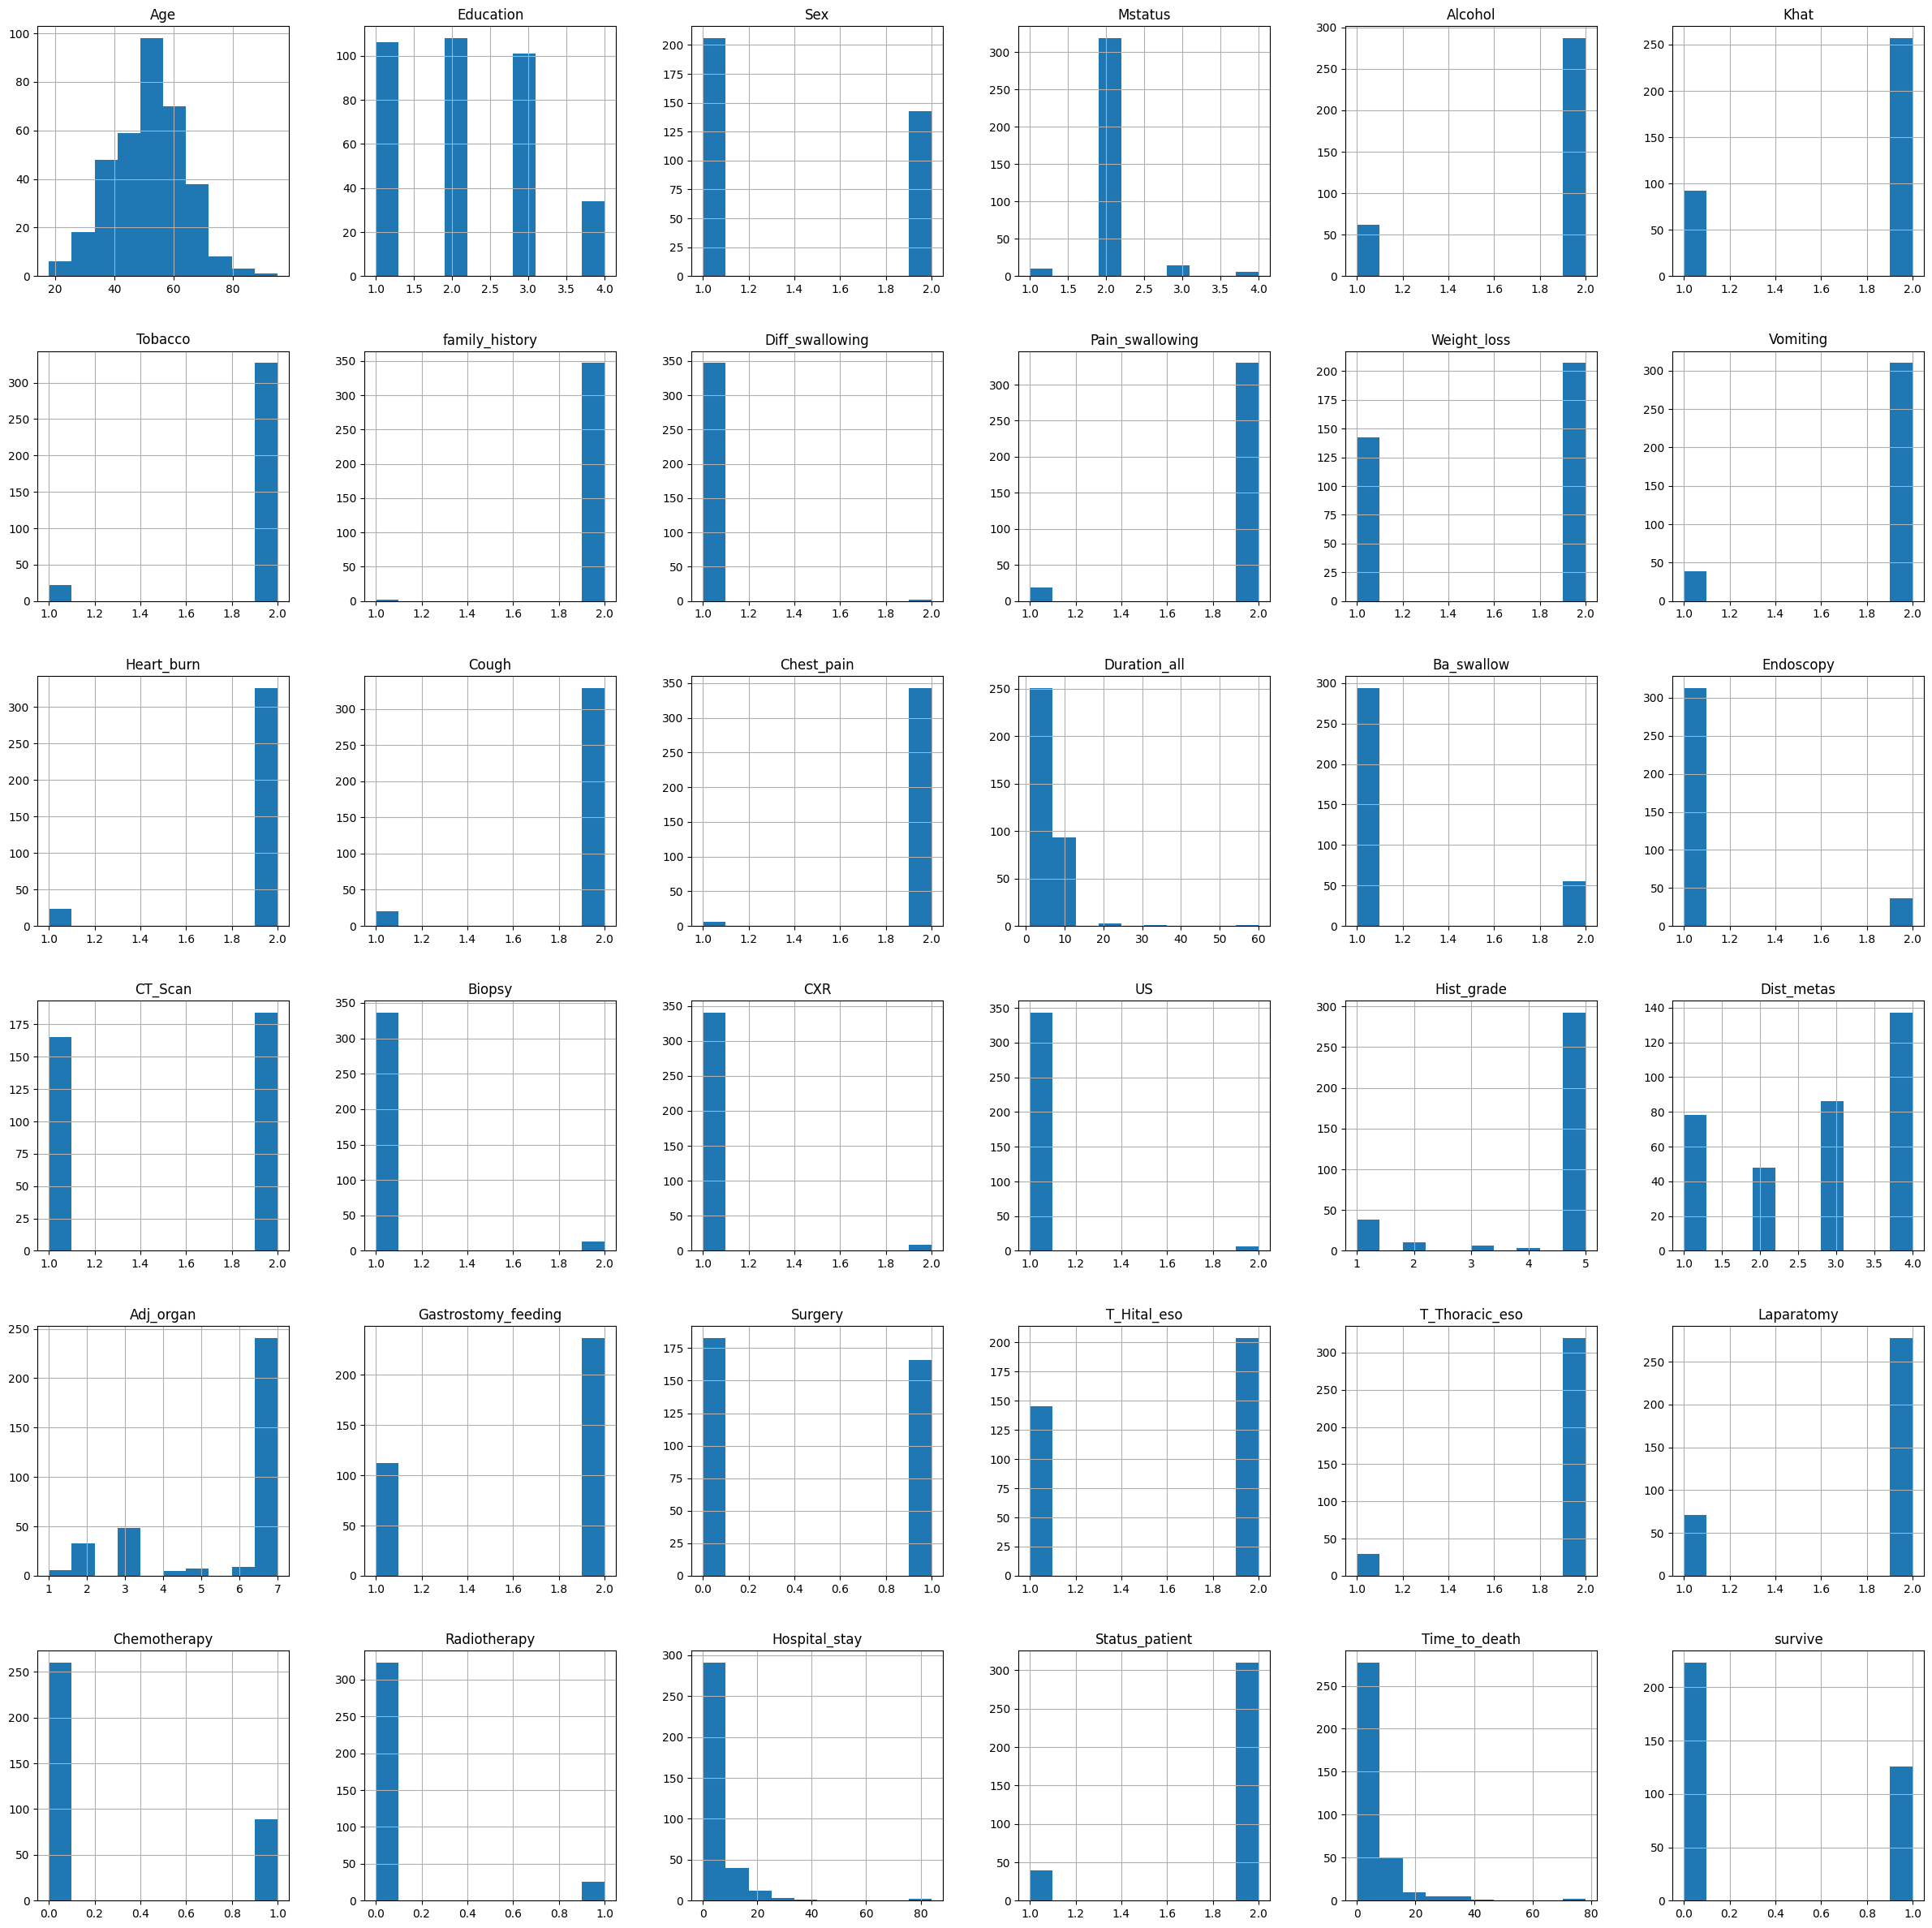

In [ ]:
#Visualisasi dari tiap variabel data
df.hist(bins=10, figsize=(30,30))
plt.show()

In [ ]:
X = df.drop(columns=['survive'])
y = df['survive']

In [ ]:
#Mengecek apa ada missing value atau noise
df.isnull().sum()

Age                    0
Education              0
Sex                    0
Mstatus                0
Alcohol                0
Khat                   0
Tobacco                0
family_history         0
Diff_swallowing        0
Pain_swallowing        0
Weight_loss            0
Vomiting               0
Heart_burn             0
Cough                  0
Chest_pain             0
Duration_all           0
Ba_swallow             0
Endoscopy              0
CT_Scan                0
Biopsy                 0
CXR                    0
US                     0
Hist_grade             0
Dist_metas             0
Adj_organ              0
Gastrostomy_feeding    0
Surgery                0
T_Hital_eso            0
T_Thoracic_eso         0
Laparatomy             0
Chemotherapy           0
Radiotherapy           0
Hospital_stay          0
Status_patient         0
Time_to_death          0
survive                0
dtype: int64

In [ ]:
#Melihat tipe data yang digunakan dari masing-masing variabel pada dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Age                  349 non-null    int64
 1   Education            349 non-null    int64
 2   Sex                  349 non-null    int64
 3   Mstatus              349 non-null    int64
 4   Alcohol              349 non-null    int64
 5   Khat                 349 non-null    int64
 6   Tobacco              349 non-null    int64
 7   family_history       349 non-null    int64
 8   Diff_swallowing      349 non-null    int64
 9   Pain_swallowing      349 non-null    int64
 10  Weight_loss          349 non-null    int64
 11  Vomiting             349 non-null    int64
 12  Heart_burn           349 non-null    int64
 13  Cough                349 non-null    int64
 14  Chest_pain           349 non-null    int64
 15  Duration_all         349 non-null    int64
 16  Ba_swallow           349 n

In [ ]:
#Import Library
from sklearn.svm import SVC

In [ ]:
#Aktivasi fungsi classifier SVM
svm = SVC(kernel='rbf')

# **K-FOLD 2**

In [ ]:
kf2 = KFold(n_splits=2)

In [ ]:
all_true_labels = []
all_predictions = []

In [ ]:
for train_index, test_index in kf2.split(X):
    # Splitting the data using .iloc for both X and y
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    smote = SMOTE()
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
    svm.fit(X_train_smote, y_train_smote)
    all_true_labels.extend(y_test)
    all_predictions.extend(svm.predict(X_test))

    # The rest of your training and validation code goes here


In [ ]:
svm.fit(X_train_smote, y_train_smote)

SVC()

In [ ]:
predictions2 = svm.predict(X_test)
accuracy2 = accuracy_score(y_test, predictions2)

In [ ]:
print("Akurasi Menggunakan k=2", accuracy2)

Akurasi Menggunakan k=2 0.9597701149425287


In [ ]:
cm = confusion_matrix(all_true_labels, all_predictions)
print(cm)

[[219   4]
 [ 13 113]]


In [ ]:
#Membuat classification report
print(classification_report(y_test, predictions2))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       100
           1       0.99      0.92      0.95        74

    accuracy                           0.96       174
   macro avg       0.96      0.95      0.96       174
weighted avg       0.96      0.96      0.96       174



In [ ]:
kinerja2 = precision_recall_fscore_support(y_test, predictions2)
kinerja2

(array([0.94285714, 0.98550725]),
 array([0.99      , 0.91891892]),
 array([0.96585366, 0.95104895]),
 array([100,  74]))

# **K-FOLD 3**

In [ ]:
kf3 = KFold(n_splits=3)

In [ ]:
all_true_labels = []
all_predictions = []

In [ ]:
for train_index, test_index in kf3.split(X):
    # Splitting the data using .iloc for both X and y
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    smote = SMOTE()
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
    svm.fit(X_train_smote, y_train_smote)
    all_true_labels.extend(y_test)
    all_predictions.extend(svm.predict(X_test))

    # The rest of your training and validation code goes here

In [ ]:
svm.fit(X_train_smote, y_train_smote)

SVC()

In [ ]:
predictions3 = svm.predict(X_test)
accuracy3 = accuracy_score(y_test, predictions3)

In [ ]:
print("Akurasi Menggunakan k=3", accuracy3)

Akurasi Menggunakan k=3 0.9224137931034483


In [ ]:
cm = confusion_matrix(all_true_labels, all_predictions)
print(cm)

[[218   5]
 [ 13 113]]


In [ ]:
#Membuat classification report
print(classification_report(y_test, predictions3))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93        63
           1       1.00      0.83      0.91        53

    accuracy                           0.92       116
   macro avg       0.94      0.92      0.92       116
weighted avg       0.93      0.92      0.92       116



In [ ]:
kinerja3 = precision_recall_fscore_support(y_test, predictions3)
kinerja3

(array([0.875, 1.   ]),
 array([1.        , 0.83018868]),
 array([0.93333333, 0.90721649]),
 array([63, 53]))

# **K-FOLD 4**

In [ ]:
kf4 = KFold(n_splits=4)

In [ ]:
all_true_labels = []
all_predictions = []

In [ ]:
for train_index, test_index in kf4.split(X):
    # Splitting the data using .iloc for both X and y
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    smote = SMOTE()
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
    svm.fit(X_train_smote, y_train_smote)
    all_true_labels.extend(y_test)
    all_predictions.extend(svm.predict(X_test))

    # The rest of your training and validation code goes here

In [ ]:
svm.fit(X_train_smote, y_train_smote)

SVC()

In [ ]:
predictions4 = svm.predict(X_test)
accuracy4 = accuracy_score(y_test, predictions4)

In [ ]:
print("Akurasi Menggunakan k=4", accuracy4)

Akurasi Menggunakan k=4 0.9540229885057471


In [ ]:
cm = confusion_matrix(all_true_labels, all_predictions)
print(cm)

[[219   4]
 [  8 118]]


In [ ]:
#Membuat classification report
print(classification_report(y_test, predictions4))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        42
           1       1.00      0.91      0.95        45

    accuracy                           0.95        87
   macro avg       0.96      0.96      0.95        87
weighted avg       0.96      0.95      0.95        87



In [ ]:
kinerja4 = precision_recall_fscore_support(y_test, predictions4)
kinerja4

(array([0.91304348, 1.        ]),
 array([1.        , 0.91111111]),
 array([0.95454545, 0.95348837]),
 array([42, 45]))

# **K-FOLD 5**

In [ ]:
kf5 = KFold(n_splits=5)

In [ ]:
all_true_labels = []
all_predictions = []

In [ ]:
for train_index, test_index in kf5.split(X):
    # Splitting the data using .iloc for both X and y
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    smote = SMOTE()
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
    svm.fit(X_train_smote, y_train_smote)
    all_true_labels.extend(y_test)
    all_predictions.extend(svm.predict(X_test))

    # The rest of your training and validation code goes here

In [ ]:
svm.fit(X_train_smote, y_train_smote)

SVC()

In [ ]:
predictions5 = svm.predict(X_test)
accuracy5 = accuracy_score(y_test, predictions5)

In [ ]:
print("Akurasi Menggunakan k=5", accuracy5)

Akurasi Menggunakan k=5 0.9855072463768116


In [ ]:
cm = confusion_matrix(all_true_labels, all_predictions)
print(cm)

[[218   5]
 [  8 118]]


In [ ]:
#Membuat classification report
print(classification_report(y_test, predictions5))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       1.00      0.97      0.99        39

    accuracy                           0.99        69
   macro avg       0.98      0.99      0.99        69
weighted avg       0.99      0.99      0.99        69



In [ ]:
kinerja5 = precision_recall_fscore_support(y_test, predictions5)
kinerja5

(array([0.96774194, 1.        ]),
 array([1.        , 0.97435897]),
 array([0.98360656, 0.98701299]),
 array([30, 39]))

# **K-FOLD 6**

In [ ]:
kf6 = KFold(n_splits=6)

In [ ]:
all_true_labels = []
all_predictions = []

In [ ]:
for train_index, test_index in kf6.split(X):
    # Splitting the data using .iloc for both X and y
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    smote = SMOTE()
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
    svm.fit(X_train_smote, y_train_smote)
    all_true_labels.extend(y_test)
    all_predictions.extend(svm.predict(X_test))

    # The rest of your training and validation code goes here

In [ ]:
svm.fit(X_train_smote, y_train_smote)

SVC()

In [ ]:
predictions6 = svm.predict(X_test)
accuracy6 = accuracy_score(y_test, predictions6)

In [ ]:
print("Akurasi Menggunakan k=6", accuracy6)

Akurasi Menggunakan k=6 0.9827586206896551


In [ ]:
cm = confusion_matrix(all_true_labels, all_predictions)
print(cm)

[[218   5]
 [  7 119]]


In [ ]:
#Membuat classification report
print(classification_report(y_test, predictions6))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        23
           1       0.97      1.00      0.99        35

    accuracy                           0.98        58
   macro avg       0.99      0.98      0.98        58
weighted avg       0.98      0.98      0.98        58



In [ ]:
kinerja6 = precision_recall_fscore_support(y_test, predictions6)
kinerja6

(array([1.        , 0.97222222]),
 array([0.95652174, 1.        ]),
 array([0.97777778, 0.98591549]),
 array([23, 35]))

# **K-FOLD 7**

In [ ]:
kf7 = KFold(n_splits=7)

In [ ]:
all_true_labels = []
all_predictions = []

In [ ]:
for train_index, test_index in kf7.split(X):
    # Splitting the data using .iloc for both X and y
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    smote = SMOTE()
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
    svm.fit(X_train_smote, y_train_smote)
    all_true_labels.extend(y_test)
    all_predictions.extend(svm.predict(X_test))

    # The rest of your training and validation code goes here

In [ ]:
svm.fit(X_train_smote, y_train_smote)

SVC()

In [ ]:
predictions7 = svm.predict(X_test)
accuracy7 = accuracy_score(y_test, predictions7)

In [ ]:
print("Akurasi Menggunakan k=7", accuracy7)

Akurasi Menggunakan k=7 0.9795918367346939


In [ ]:
cm = confusion_matrix(all_true_labels, all_predictions)
print(cm)

[[220   3]
 [  5 121]]


In [ ]:
#Membuat classification report
print(classification_report(y_test, predictions7))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.96      0.98        28

    accuracy                           0.98        49
   macro avg       0.98      0.98      0.98        49
weighted avg       0.98      0.98      0.98        49



In [ ]:
kinerja7 = precision_recall_fscore_support(y_test, predictions7)
kinerja7

(array([0.95454545, 1.        ]),
 array([1.        , 0.96428571]),
 array([0.97674419, 0.98181818]),
 array([21, 28]))

# **K-FOLD 8**

In [ ]:
kf8 = KFold(n_splits=8)

In [ ]:
all_true_labels = []
all_predictions = []

In [ ]:
for train_index, test_index in kf8.split(X):
    # Splitting the data using .iloc for both X and y
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    smote = SMOTE()
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
    svm.fit(X_train_smote, y_train_smote)
    all_true_labels.extend(y_test)
    all_predictions.extend(svm.predict(X_test))

    # The rest of your training and validation code goes here

In [ ]:
svm.fit(X_train_smote, y_train_smote)

SVC()

In [ ]:
predictions8 = svm.predict(X_test)
accuracy8 = accuracy_score(y_test, predictions8)

In [ ]:
print("Akurasi Menggunakan k=8", accuracy8)

Akurasi Menggunakan k=8 0.9767441860465116


In [ ]:
cm = confusion_matrix(all_true_labels, all_predictions)
print(cm)

[[218   5]
 [  4 122]]


In [ ]:
#Membuat classification report
print(classification_report(y_test, predictions8))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.96      0.98        24

    accuracy                           0.98        43
   macro avg       0.97      0.98      0.98        43
weighted avg       0.98      0.98      0.98        43



In [ ]:
kinerja8 = precision_recall_fscore_support(y_test, predictions8)
kinerja8

(array([0.95, 1.  ]),
 array([1.        , 0.95833333]),
 array([0.97435897, 0.9787234 ]),
 array([19, 24]))

# **K-FOLD 9**

In [ ]:
kf9 = KFold(n_splits=9)

In [ ]:
all_true_labels = []
all_predictions = []

In [ ]:
for train_index, test_index in kf9.split(X):
    # Splitting the data using .iloc for both X and y
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    smote = SMOTE()
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
    svm.fit(X_train_smote, y_train_smote)
    all_true_labels.extend(y_test)
    all_predictions.extend(svm.predict(X_test))

    # The rest of your training and validation code goes here

In [ ]:
svm.fit(X_train_smote, y_train_smote)

SVC()

In [ ]:
predictions9 = svm.predict(X_test)
accuracy9 = accuracy_score(y_test, predictions9)

In [ ]:
print("Akurasi Menggunakan k=9", accuracy9)

Akurasi Menggunakan k=9 0.9736842105263158


In [ ]:
cm = confusion_matrix(all_true_labels, all_predictions)
print(cm)

[[219   4]
 [  5 121]]


In [ ]:
#Membuat classification report
print(classification_report(y_test, predictions9))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.95      0.97        19

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.97      0.97      0.97        38



In [ ]:
kinerja9 = precision_recall_fscore_support(y_test, predictions9)
kinerja9

(array([0.95, 1.  ]),
 array([1.        , 0.94736842]),
 array([0.97435897, 0.97297297]),
 array([19, 19]))

# **K-FOLD 10**

In [ ]:
kf10 = KFold(n_splits=10)

In [ ]:
all_true_labels = []
all_predictions = []

In [ ]:
for train_index, test_index in kf10.split(X):
    # Splitting the data using .iloc for both X and y
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    smote = SMOTE()
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
    svm.fit(X_train_smote, y_train_smote)
    all_true_labels.extend(y_test)
    all_predictions.extend(svm.predict(X_test))

    # The rest of your training and validation code goes here

In [ ]:
svm.fit(X_train_smote, y_train_smote)

SVC()

In [ ]:
predictions10 = svm.predict(X_test)
accuracy10 = accuracy_score(y_test, predictions10)

In [ ]:
print("Akurasi Menggunakan k=10", accuracy10)

Akurasi Menggunakan k=10 0.9411764705882353


In [ ]:
cm = confusion_matrix(all_true_labels, all_predictions)
print(cm)

[[218   5]
 [  4 122]]


In [ ]:
#Membuat classification report
print(classification_report(y_test, predictions10))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        17
           1       1.00      0.88      0.94        17

    accuracy                           0.94        34
   macro avg       0.95      0.94      0.94        34
weighted avg       0.95      0.94      0.94        34



In [ ]:
kinerja10 = precision_recall_fscore_support(y_test, predictions10)
kinerja10

(array([0.89473684, 1.        ]),
 array([1.        , 0.88235294]),
 array([0.94444444, 0.9375    ]),
 array([17, 17]))

In [ ]:
print(f'Tingkat akurasi SVM k-fold 2: {accuracy2 * 100}%')
print(f'Tingkat akurasi SVM k-fold 3: {accuracy3 * 100}%')
print(f'Tingkat akurasi SVM k-fold 4: {accuracy4 * 100}%')
print(f'Tingkat akurasi SVM k-fold 5: {accuracy5 * 100}%')
print(f'Tingkat akurasi SVM k-fold 6: {accuracy6 * 100}%')
print(f'Tingkat akurasi SVM k-fold 7: {accuracy7 * 100}%')
print(f'Tingkat akurasi SVM k-fold 8: {accuracy8 * 100}%')
print(f'Tingkat akurasi SVM k-fold 9: {accuracy9 * 100}%')
print(f'Tingkat akurasi SVM k-fold 10: {accuracy10 * 100}%')

Tingkat akurasi SVM k-fold 2: 95.97701149425288%
Tingkat akurasi SVM k-fold 3: 92.24137931034483%
Tingkat akurasi SVM k-fold 4: 95.40229885057471%
Tingkat akurasi SVM k-fold 5: 98.55072463768117%
Tingkat akurasi SVM k-fold 6: 98.27586206896551%
Tingkat akurasi SVM k-fold 7: 97.95918367346938%
Tingkat akurasi SVM k-fold 8: 97.67441860465115%
Tingkat akurasi SVM k-fold 9: 97.36842105263158%
Tingkat akurasi SVM k-fold 10: 94.11764705882352%
